In [13]:
import pandas as pd
import pickle
from ast import literal_eval
import numpy as np
import matplotlib.pyplot
import seaborn as sb

In [14]:
df = pd.read_csv('chess_dataset.csv',converters={"eval": literal_eval,"white": literal_eval,"black": literal_eval})

In [15]:
df['advantage_at_5']=df['eval'].apply(lambda x: x[4])

In [16]:
df['advantage_at_10']=df['eval'].apply(lambda x: x[9])

In [17]:
df['nb_moves'] = df['eval'].apply(lambda x: len(x))

In [18]:
def nb_checks(s):
    return(s.count('+',s.find('\n\n1')))

df['nb_checks'] = df['pgn'].apply(nb_checks)

In [20]:
def compute_eval(l,start=1):
    result = []
    prev_score = l[start-1]
    for i,score in enumerate(l[start:]):
        if (i%2!=0):
            result.append(score-prev_score)
        else:
            result.append(prev_score-score)
        prev_score = score
    bins = np.array([-100000,-1000,-500,-200,-100,-50,-10,0,1000])
    hist = list(np.histogram(result,bins=bins)[0])
    hist_p = [np.round(item/(len(l)-start),4) for item in hist]
    return hist_p

df['computed_eval'] = df['eval'].apply(compute_eval)
df['move_quality_1'] = df['computed_eval'].apply(lambda x: x[7])
df['move_quality_2'] = df['computed_eval'].apply(lambda x: x[6])
df['move_quality_3'] = df['computed_eval'].apply(lambda x: x[5])
df['move_quality_4'] = df['computed_eval'].apply(lambda x: x[4])
df['move_quality_5'] = df['computed_eval'].apply(lambda x: x[3])
df['move_quality_6'] = df['computed_eval'].apply(lambda x: x[2])
df['move_quality_7'] = df['computed_eval'].apply(lambda x: x[1])
df['move_quality_8'] = df['computed_eval'].apply(lambda x: x[0])
df.drop(['computed_eval'], axis=1, inplace=True)


In [21]:
df.drop(['end_time','rated','fen','time_class','rules','index'], axis=1, inplace=True)

In [22]:
def mean_elo(df):
    return((df['white']['rating']+df['black']['rating'])/2)
#df['elo']=
df['elo'] = df.apply(mean_elo, axis=1)

In [23]:
def resignation(pgn):
    return(pgn.find('resignation')!=-1)

df['resignation'] = df['pgn'].apply(resignation)

In [24]:
def win_on_time(pgn):
    return(pgn.find('on time')!=-1)

df['win_on_time'] = df['pgn'].apply(win_on_time)

In [25]:
def stalemate(pgn):
    return(pgn.find('drawn by stalemate')!=-1)

df['stalemate'] = df['pgn'].apply(stalemate)

In [26]:
def abandon(pgn):
    return(pgn.find('abandoned')!=-1)

df['abandon'] = df['pgn'].apply(abandon)

In [27]:
def checkmate(pgn):
    return(pgn.find('checkmate')!=-1)

df['checkmate'] = df['pgn'].apply(checkmate)

In [28]:
def drawn_agreement(pgn):
    return(pgn.find('drawn by agreement')!=-1)

df['drawn_agreement'] = df['pgn'].apply(drawn_agreement)

In [29]:
def drawn_material(pgn):
    return(pgn.find('insufficient material')!=-1)

df['drawn_material'] = df['pgn'].apply(drawn_material)

In [30]:
def drawn_rep_or_50(pgn):
    return((pgn.find('drawn by repetition')!=-1) or (pgn.find('50-move rule')!=-1))

df['drawn_rep_or_50'] = df['pgn'].apply(drawn_rep_or_50)

In [31]:
def openings(pgn):
    start = pgn.find('ECO "')
    return(pgn[start+5:start+8])
    
df['opening'] = df['pgn'].apply(openings)

In [32]:
open_counts = df['opening'].value_counts()

def clean_openings(opening):
    if(open_counts[opening]<=10):
        return('Other')
    else:
        return(opening)
    
df['opening'] = df['opening'].apply(clean_openings)

In [33]:
df.drop(['pgn'],axis=1,inplace=True)

In [34]:
df.sample(20)

,url,eval,time_control,white,black,advantage_at_5,advantage_at_10,nb_moves,nb_checks,move_quality_1,...,elo,resignation,win_on_time,stalemate,abandon,checkmate,drawn_agreement,drawn_material,drawn_rep_or_50,opening
6677,https://www.chess.com/game/live/21412793457,"[29, 46, 26, 31, 13, 18, 24, 37, 39, 23, 16, 1...",180,"{'rating': 2050, 'result': 'win', '@id': 'http...","{'rating': 2033, 'result': 'resigned', '@id': ...",13,23,97,10,0.2396,...,2041.5,True,False,False,False,False,False,False,False,B13
5527,https://www.chess.com/game/live/21408668355,"[15, 30, 24, 20, -29, 55, 36, 47, 49, 38, 37, ...",180,"{'rating': 1651, 'result': 'timeout', '@id': '...","{'rating': 1632, 'result': 'win', '@id': 'http...",-29,38,124,7,0.1951,...,1641.5,False,True,False,False,False,False,False,False,A00
2990,https://www.chess.com/game/live/21324051213,"[45, 90, 38, 29, -11, 41, -23, 37, -5, 51, -21...",300,"{'rating': 1081, 'result': 'win', '@id': 'http...","{'rating': 1062, 'result': 'resigned', '@id': ...",-11,51,89,9,0.2841,...,1071.5,True,False,False,False,False,False,False,False,A40
11056,https://www.chess.com/game/live/21416977639,"[23, 34, 27, 28, 24, 36, 10, 42, 42, 50, 62, 6...",180+2,"{'rating': 835, 'result': 'checkmated', '@id':...","{'rating': 933, 'result': 'win', '@id': 'https...",24,50,102,19,0.4158,...,884.0,False,False,False,False,True,False,False,False,B10
8005,https://www.chess.com/game/live/21408101253,"[28, 26, 26, 56, 40, 50, 17, 62, 72, 61, 49, 3...",180,"{'rating': 2499, 'result': 'win', '@id': 'http...","{'rating': 2459, 'result': 'resigned', '@id': ...",40,61,97,3,0.3333,...,2479.0,True,False,False,False,False,False,False,False,B32
30,https://www.chess.com/game/live/21357616033,"[45, 30, -14, 94, 92, 188, 186, 208, 155, 247,...",300+5,"{'rating': 1110, 'result': 'win', '@id': 'http...","{'rating': 1161, 'result': 'resigned', '@id': ...",92,247,45,2,0.2273,...,1135.5,True,False,False,False,False,False,False,False,A45
3606,https://www.chess.com/game/live/21405598109,"[27, 62, 48, 156, 196, 326, 316, 715, 188, 264...",300,"{'rating': 1284, 'result': 'checkmated', '@id'...","{'rating': 1344, 'result': 'win', '@id': 'http...",196,264,108,12,0.1869,...,1314.0,False,False,False,False,True,False,False,False,C40
17181,https://www.chess.com/game/live/21232908863,"[37, 36, 46, 82, 14, 36, 9, 46, 23, 103, 60, 1...",300+5,"{'rating': 902, 'result': 'win', '@id': 'https...","{'rating': 839, 'result': 'resigned', '@id': '...",14,103,45,1,0.1591,...,870.5,True,False,False,False,False,False,False,False,B28
11175,https://www.chess.com/game/live/21263452209,"[30, 42, 46, 74, 58, 75, 59, 101, 79, 146, 143...",300+5,"{'rating': 725, 'result': 'resigned', '@id': '...","{'rating': 771, 'result': 'win', '@id': 'https...",58,146,64,5,0.1429,...,748.0,True,False,False,False,False,False,False,False,B54
17220,https://www.chess.com/game/live/21400904027,"[34, 41, 35, 53, 70, 242, 223, 248, 155, 241, ...",300+5,"{'rating': 1012, 'result': 'win', '@id': 'http...","{'rating': 973, 'result': 'resigned', '@id': '...",70,241,44,4,0.1628,...,992.5,True,False,False,False,False,False,False,False,C42


In [345]:
df['opening'].value_counts()['Other']

574

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000264A0CA6B48>,
      dtype=object)

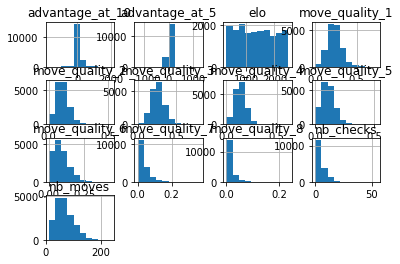

In [391]:
df.hist()

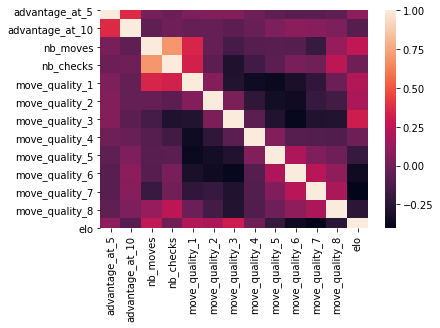

In [390]:
sb.heatmap(df.corr())

In [41]:
df['advantage_at_5'] = df['advantage_at_5'].apply(lambda x: abs(x))
df['advantage_at_10'] = df['advantage_at_10'].apply(lambda x: abs(x))

def analysis(l,start=0):
    result = []
    prev_score = l[start-1]
    for i,score in enumerate(l[start:]):
        result.append(abs(score))
    bins = np.array([0,100,200,400,10000])
    hist = list(np.histogram(result,bins=bins)[0])
    hist_p = [np.round(item/(len(l)-start),4) for item in hist]
    return hist_p

df['analysis'] = df['eval'].apply(compute_eval)
df['analysis1'] = df['analysis'].apply(lambda x: x[0])
df['analysis2'] = df['analysis'].apply(lambda x: x[1])
df['analysis3'] = df['analysis'].apply(lambda x: x[2])
df['analysis4'] = df['analysis'].apply(lambda x: x[3])
df.drop(['analysis'], axis=1, inplace=True)

In [44]:
df = df.drop(['url','eval','time_control','white','black'],axis=1)

In [46]:
df.columns

Index(['advantage_at_5', 'advantage_at_10', 'nb_moves', 'nb_checks',
       'move_quality_1', 'move_quality_2', 'move_quality_3', 'move_quality_4',
       'move_quality_5', 'move_quality_6', 'move_quality_7', 'move_quality_8',
       'elo', 'resignation', 'win_on_time', 'stalemate', 'abandon',
       'checkmate', 'drawn_agreement', 'drawn_material', 'drawn_rep_or_50',
       'opening', 'analysis1', 'analysis2', 'analysis3', 'analysis4'],
      dtype='object')

In [50]:
df.drop_duplicates(subset =['nb_moves', 'nb_checks','elo', 'resignation', 'win_on_time', 'stalemate', 'abandon',
       'checkmate', 'drawn_agreement', 'drawn_material', 'drawn_rep_or_50',
       'opening'],
                     keep = False, inplace = True)

In [51]:
len(df)

17390

In [53]:
pickle.dump( df, open( "chess_df.p", "wb" ) )